In [1]:
# prompt: ​​https://drive.google.com/file/d/1WitkhJkSQRkd0ghvG0cVva0nwL7M_uLc/view?usp=drive_link.   wget download the file dfrom this lnk

#!wget https://drive.google.com/uc?id=1WitkhJkSQRkd0ghvG0cVva0nwL7M_uLc
!wget https://drive.google.com/uc?id=1XDzkmJ4g9P9buUjXEwzD7RxDgQ5BEFKI


--2025-06-13 13:00:25--  https://drive.google.com/uc?id=1XDzkmJ4g9P9buUjXEwzD7RxDgQ5BEFKI
Resolving drive.google.com (drive.google.com)... 192.178.163.139, 192.178.163.138, 192.178.163.101, ...
Connecting to drive.google.com (drive.google.com)|192.178.163.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1XDzkmJ4g9P9buUjXEwzD7RxDgQ5BEFKI [following]
--2025-06-13 13:00:25--  https://drive.usercontent.google.com/download?id=1XDzkmJ4g9P9buUjXEwzD7RxDgQ5BEFKI
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.199.132, 2607:f8b0:400e:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.199.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22785558 (22M) [application/octet-stream]
Saving to: ‘uc?id=1XDzkmJ4g9P9buUjXEwzD7RxDgQ5BEFKI’

uc?id=1XDzkmJ4g9P9b 100%[===================>]  21.73M  39.3MB/s    in 0.6s    

20

# NLP - Hotel review sentiment analysis in python

In [2]:
!unzip /content/uc?id=1XDzkmJ4g9P9buUjXEwzD7RxDgQ5BEFKI

Archive:  /content/uc?id=1XDzkmJ4g9P9buUjXEwzD7RxDgQ5BEFKI
  inflating: test.csv                
  inflating: train.csv               


## Data Facts and Import

In [3]:
import pandas as pd
# Local directory
Reviewdata = pd.read_csv('/content/train.csv')



In [4]:
Reviewdata.shape

(38932, 5)

In [5]:
Reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [6]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [7]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id49257,1
Description,38932,38932,The Westin is a wonderfully restored grande da...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


## Data Cleaning / EDA

In [8]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


Percentage for default

Is_Response
happy        68.12
not happy    31.88
Name: proportion, dtype: float64


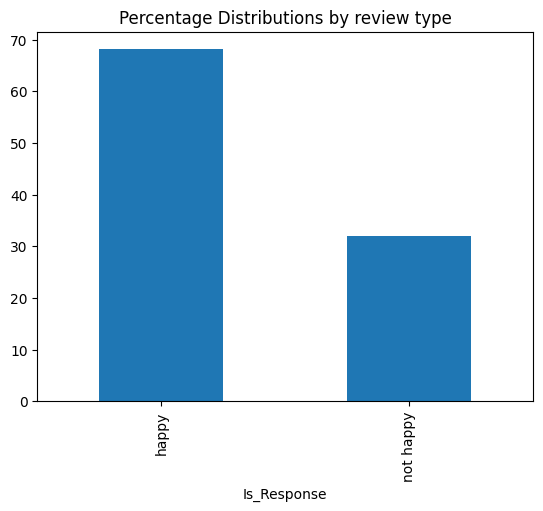

In [9]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline

print('Percentage for default\n')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [10]:
#Removing columns
Reviewdata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [11]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [12]:
# Let's take a look at the updated text
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [13]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)

    return text

cleaned2 = lambda x: text_clean_2(x)

In [14]:
# Let's take a look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


## Model training

In [15]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.Is_Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.2, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 31145
IV_test  : 7787
DV_train : 31145
DV_test  : 7787


What is TfidfVectorizer?

Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF). The term frequency is the number of occurrences of a specific term in a document.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(max_iter=10000)


from sklearn.pipeline import Pipeline

In [17]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[4951,  598],
       [ 300, 1938]])

## Model prediciton

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8846795941954539
Precision :  0.8915171937305089
Recall :  0.8846795941954539


## Trying on new reviews

In [19]:
example = ["we had a corporate outing to the ABC hotel,we had and average experince it but the roads to reach the destination wasn't so good"]
ex2=["i had a bad day in the hotel"]


result = model.predict(example)

print(result)

['not happy']


In [20]:
!pip install gradio



In [21]:
import gradio as gr

def predict_sentiment(text):
  result = model.predict([text])

  if result :
    return result


# Create the interface using the updated API
demo = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=5, label="Review Text"),
    outputs="text"
)

# Launch the interface
demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9de99fda2803049108.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
